# I/ Entraîner, évaluer et optimiser un modèle 
## Application aux données du Titanic

## 1) Entraîner et évaluer un modèle (Train_set et Test_set) 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# récupération des données
titanic = sns.load_dataset("titanic")
titanic.shape

#Sélection des variables qui nous intéressent
titanic= titanic[["survived","pclass","sex","age"]]
titanic.dropna(axis=0, inplace=True)
titanic["sex"].replace(["male","female"],[0,1], inplace=True)
print(titanic.head())

#Choix du modèle et séparation features (X) et label/target variable (y)
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
y= titanic["survived"]
X = titanic.drop("survived",axis=1)

print("taille variable X:", X.shape)
print("taille variable y:", y.shape)

#Créer un test set et un train set
from sklearn.model_selection import train_test_split #On divise le dataset pour l'entraînement et pour le test 
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2)

print(" ")
print("Taille Train set et Test set:")
print("Train set:",X_train.shape)
print("Test set:",X_test.shape)

#Entraîner et évaluer
model.fit(X_train,y_train)
print("Train score:", model.score(X_train,y_train))
print("Test score:", model.score(X_test,y_test)) #Pour les données du test set on a un score plus faible puisque ce sont des données que le modèle n'a jamais étudiées

   survived  pclass  sex   age
0         0       3    0  22.0
1         1       1    1  38.0
2         1       3    1  26.0
3         1       1    1  35.0
4         0       3    0  35.0
taille variable X: (714, 3)
taille variable y: (714,)
 
Taille Train set et Test set:
Train set: (571, 3)
Test set: (143, 3)
Train score: 0.8353765323992994
Test score: 0.6923076923076923


## 2) Trouver les meilleurs hyperparamètres n_neighbors, metrics et weights

In [108]:
# Gridsearch permet de trouver les meilleurs hyperparamètres
param_grid = {"n_neighbors":np.arange(1,20), "metric":["euclidean","manhattan","minkowski"],"weights":["uniform", "distance"]} #dictionnaire contenant les différents hyperparamètres à régler ainsi que leurs différentes valeurs possibles
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(X_train,y_train)
print("le meilleur score pour le modèle")
print(grid.best_score_)
print("les meilleurs parametres pour le modèle")
print(grid.best_params_)

#On sauvegarde ce modèle
model=grid.best_estimator_

le meilleur score pour le modèle
0.7811136536994661
les meilleurs parametres pour le modèle
{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


## 3) Est-ce que collecter plus de données serait utile ? (Learning curves)

[0.2 0.4 0.6 0.8 1. ]
[ 91 182 273 364 456]


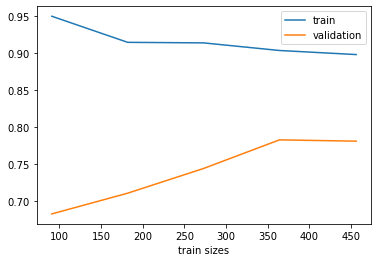

In [109]:
from sklearn.model_selection import learning_curve

# Utilisation de la fonction learning curve
N,train_score, val_score=learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.2,1.0,5), cv=5)
#train_sizes permet d'indiquer sur quel pourcentage de données on travaille. Ici de 20% à 100% avec 5 tests entre ces valeurs
print(np.linspace(0.2,1.0,5))
print(N)

plt.plot(N,train_score.mean(axis=1),label= "train")
plt.plot(N,val_score.mean(axis=1),label= "validation")
plt.xlabel("train sizes")
plt.legend()

Les learning curves nous donnent l'évolution des performances du modèle en fonction de la quantité de données qu'on lui fournit. Plus on a de données, plus la performance sera bonne. Cependant, il arrive un moment ou on atteint un seuil ou la performance se stabilise malgré un ajout de données. Chercher ce point évite de devoir récupérer trop de données finalement inutiles.
Dans le cas présenté ici, il semblerait que nous n'atteignons pas encore le seuil de stabilisation. Ainsi, pour cette étude nous aurions besoin de plus de données.

# On développe un modèle de classification pour déterminer si un passager du Titanic va survivre ou non.

In [110]:
def survie(model,pclass,sex,age):
    x=np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))
    print("0= mort, 1= survie")
    print("")
    print("probabilité de mort | probabilité de survie")
    print(model.predict_proba(x))
    

# pclass: 1= 1ère classe, 2= 2ème, 3=3ème
# sex: 0=homme, 1=femme
survie(model,2,1,30)   # cas d'une femme de 30 ans en seconde classe

[1]
0= mort, 1= survie

probabilité de mort | probabilité de survie
[[0. 1.]]


# II/ Exploration de données 
## Diagnosis of COVID-19 and it's clinical spectrum

## 1) Analyse de forme

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Permet d'afficher toutes les lignes et toutes les colonnes
pd.set_option("display.max_row",111)
pd.set_option("display.max_column",111)

data= pd.read_excel("dataset.xlsx")
# On crée une copie du dataset
df=data.copy()
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

(5644, 111)
float64    70
object     37
int64       4
dtype: int64
On voit tout le dataset avec en blanc les valeurs manquantes et en noir là ou on a des valeurs.


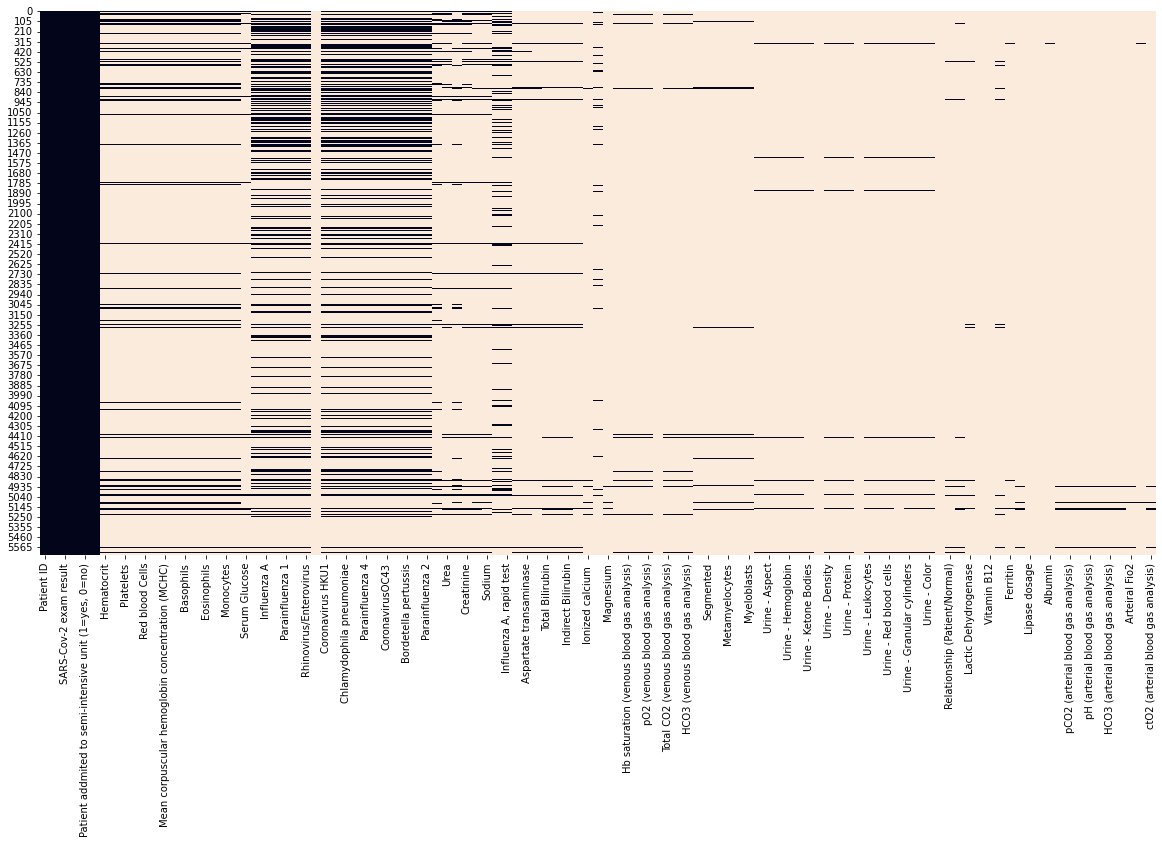

In [112]:
print(df.shape)
print(df.dtypes.value_counts())

# On affiche une image de la taille de nos données selon si nos valeurs sont des NaN ou pas
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
print("On voit tout le dataset avec en blanc les valeurs manquantes et en noir là ou on a des valeurs.")

In [113]:
#Pourcentage de valeurs manquantes dans chaque colonne
(df.isna().sum()/df.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

## 2) Analyse de fond 

In [114]:
# On élimine les colonnes inutiles (ici toutes les colonnes contenant plus de 90% de Nan)
# Pour cela, on identifie toutes les colonnes pour lesquelles le pourcentage de NaN est inférieur à 90% et on supprime les autres
df=df[df.columns[df.isna().sum()/df.shape[0] <0.9]]

# On veut aussi éliminer la colonne patient ID car elle ne sert à rien
df= df.drop("Patient ID", axis=1)

# Visualisation de la target
df["SARS-Cov-2 exam result"]

# On compte le nombre de cas positifs et le nombre de cas négatifs
print(df["SARS-Cov-2 exam result"].value_counts(normalize = True))
print("On remarque qu'il y a beaucoup plus de cas négatifs que de cas positifs, nos classes ne sont donc pas équilibrées.")
print("Ainsi, il faudra utiliser une métrique (scoreF1, sensibilité, précision ).")

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64
On remarque qu'il y a beaucoup plus de cas négatifs que de cas positifs, nos classes ne sont donc pas équilibrées.
Ainsi, il faudra utiliser une métrique (scoreF1, sensibilité, précision ).


C:\Users\Marie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

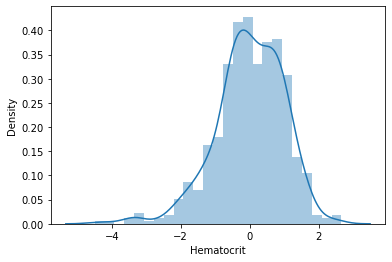

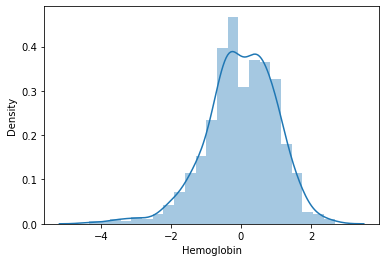

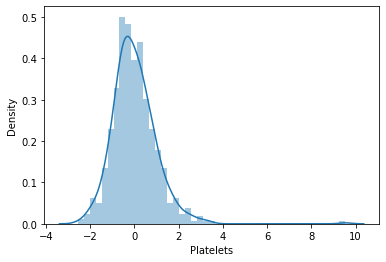

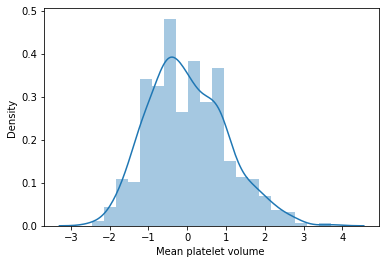

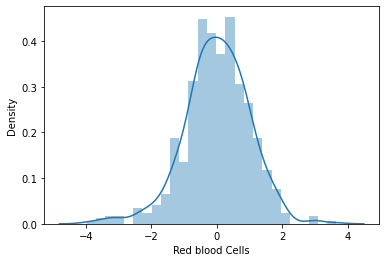

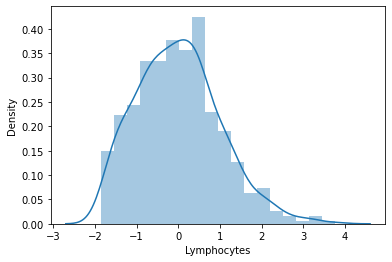

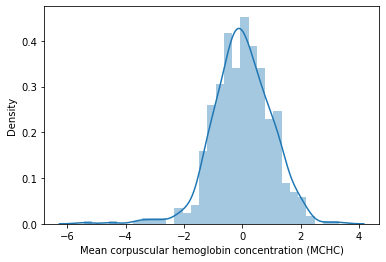

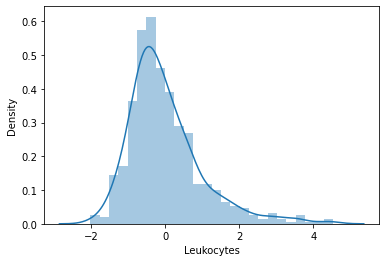

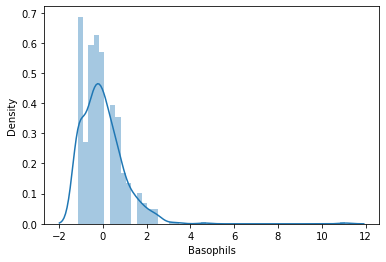

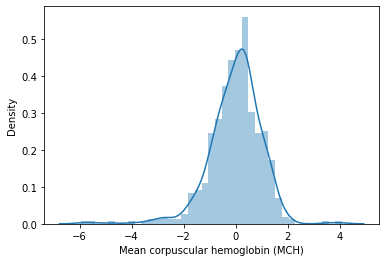

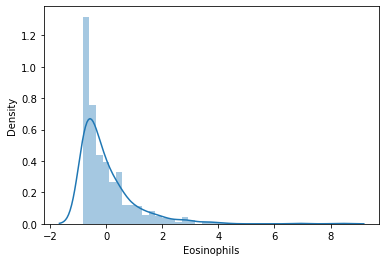

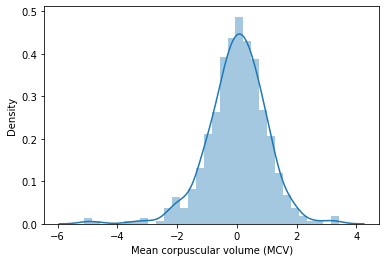

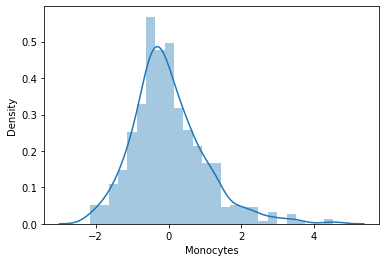

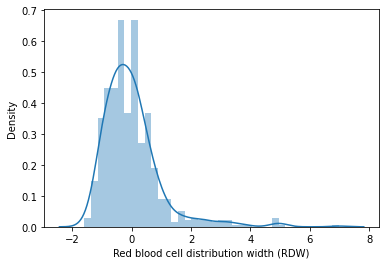

In [115]:
# Signification des variables:
# Histogramme des variables continues

for col in df.select_dtypes("float"):
    plt.figure()
    sns.distplot(df[col])

C:\Users\Marie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

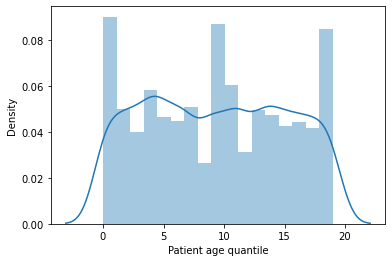

In [116]:
# Étude de la variable Patient age quantile
sns.distplot(df["Patient age quantile"])

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

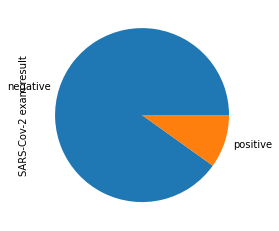

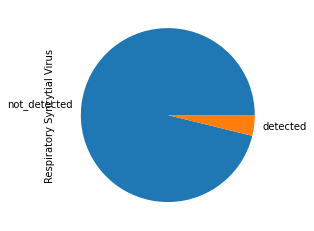

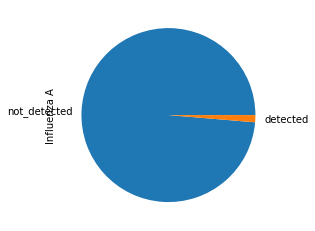

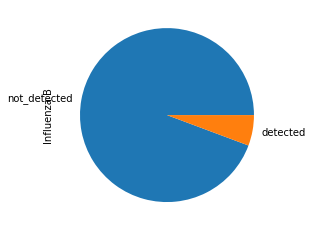

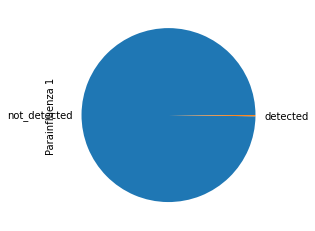

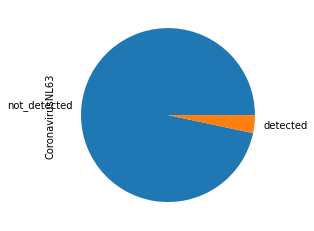

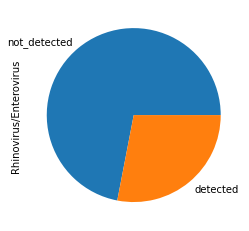

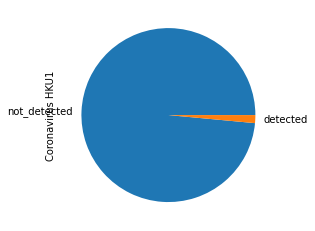

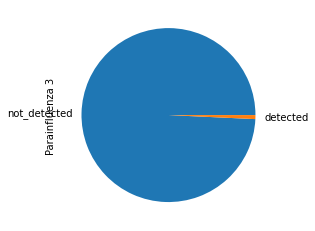

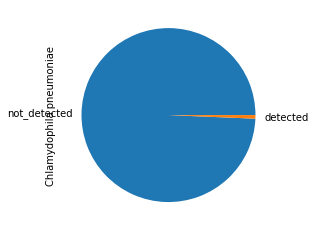

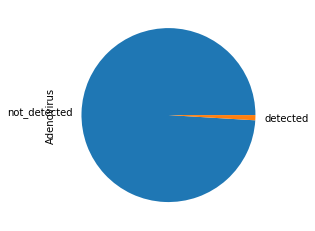

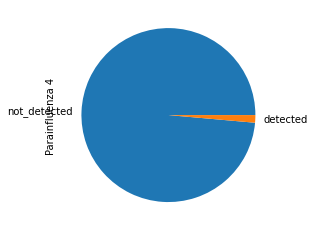

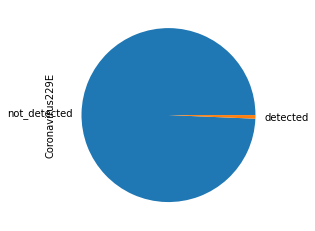

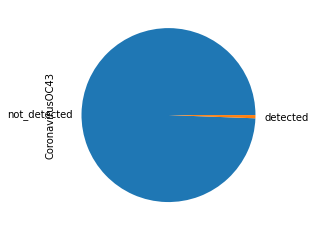

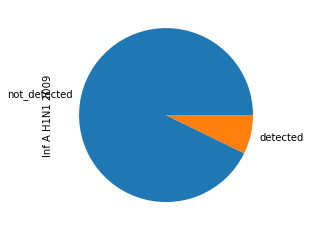

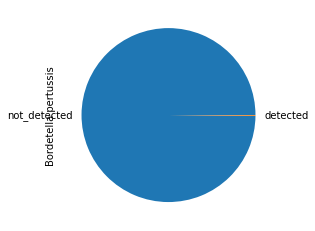

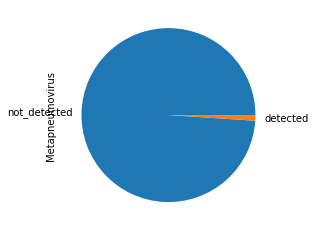

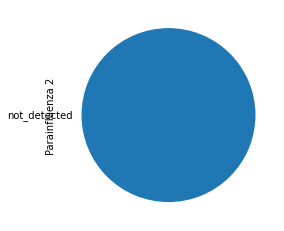

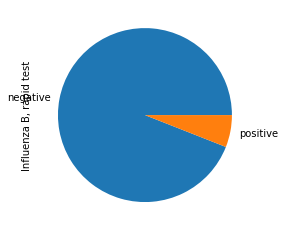

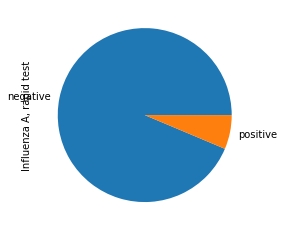

In [117]:
# Variables de type objects (Qualitatives)
# On étudie d'abord les différents types de catégories qui résident dans chaque variable

for col in df.select_dtypes("object"):
    print(f"{col :-<50} {df[col].unique()}")
    

# On compte ensuite le nombre de valeurs qu'il y a pour chaque catégorie

for col in df.select_dtypes("object"):
    plt.figure()
    df[col].value_counts().plot.pie()

C:\Users\Marie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\Marie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

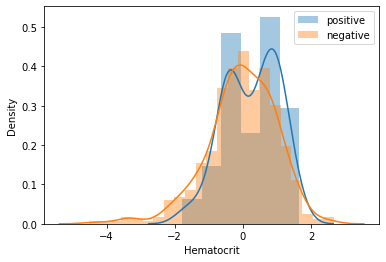

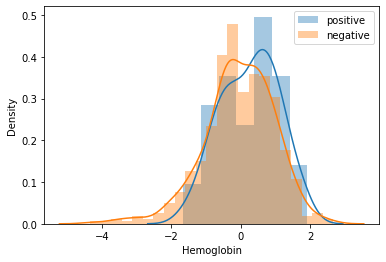

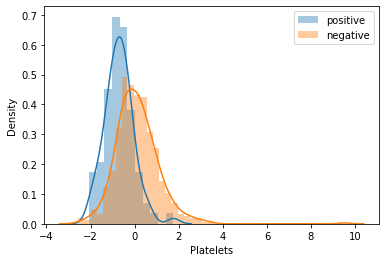

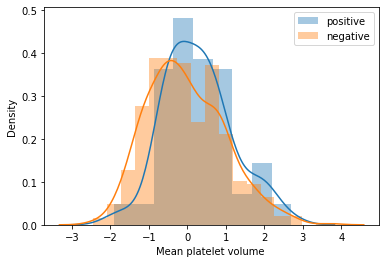

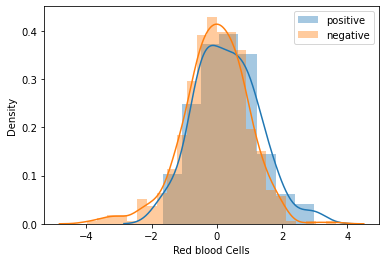

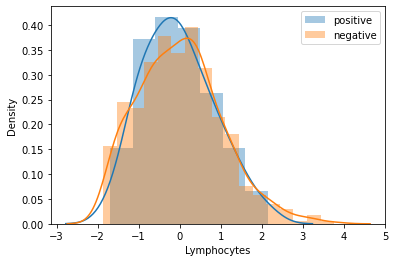

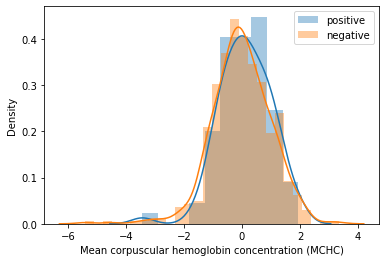

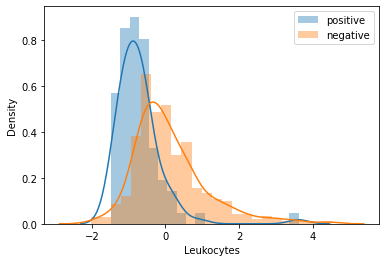

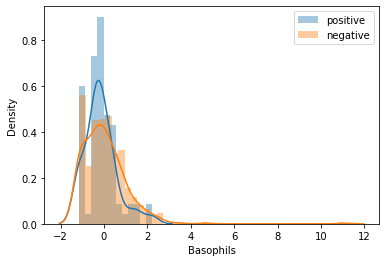

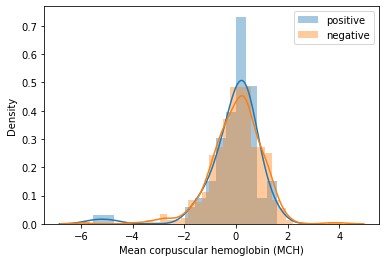

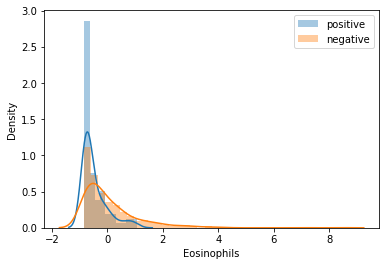

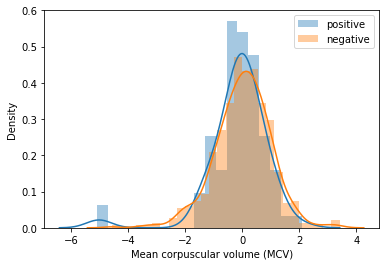

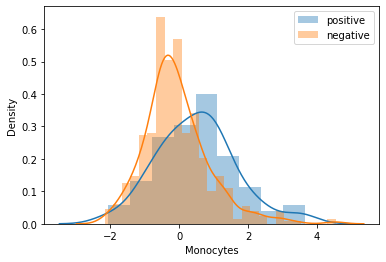

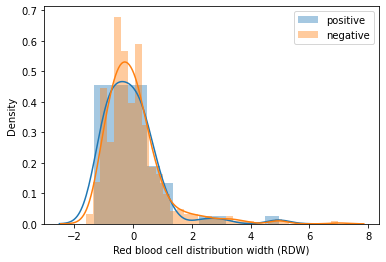

In [118]:
# 1) Relation entre nos variables et notre target

# Création de sous-ensembles individus positifs et individus négatifs pour faciliter l'analyse

positive_df = df[df["SARS-Cov-2 exam result"] == "positive"]
negative_df = df[df["SARS-Cov-2 exam result"] == "negative"]

# création des ensembles blood et viral
# Nous avons vu précédemment que l'étude des NaN pouvait séparer les ensembles blood et viral

missing_rate = df.isna().sum()/df.shape[0] # tableau avec pourcentage de nan pour chaque variable
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]


# Relation TARGET/BLOOD

for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label="positive")
    sns.distplot(negative_df[col], label="negative")
    plt.legend()

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

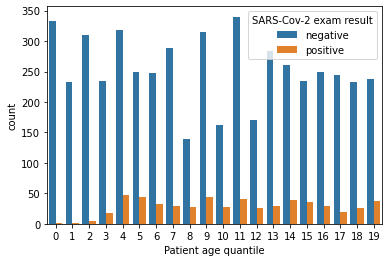

In [119]:
# Relation TARGET/AGE

# On regarde, pour chaque tranche d'âge associée à la variable Patient age quantile, le nombre de cas positifs et négatifs
sns.countplot(x="Patient age quantile", hue = "SARS-Cov-2 exam result", data = df)

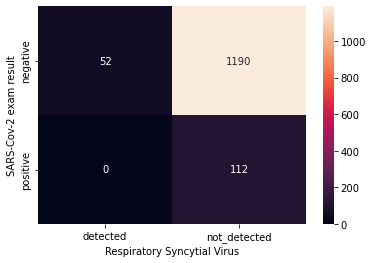

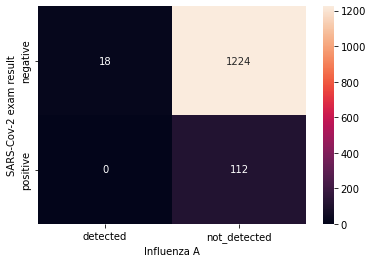

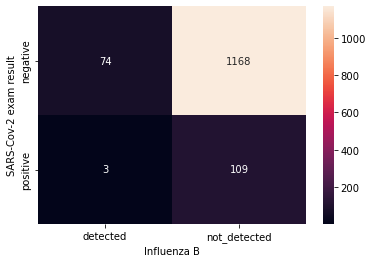

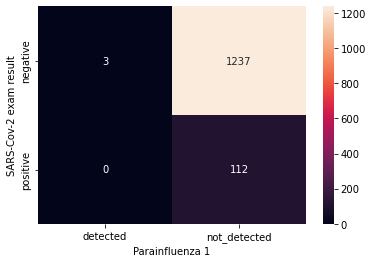

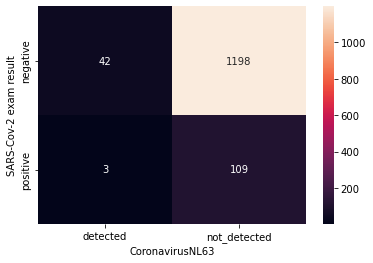

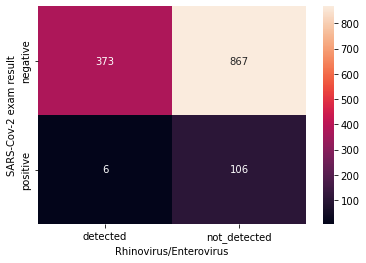

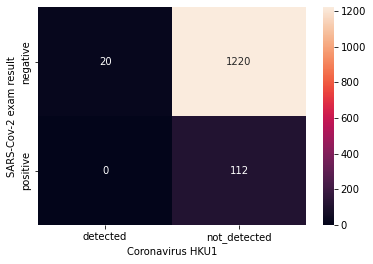

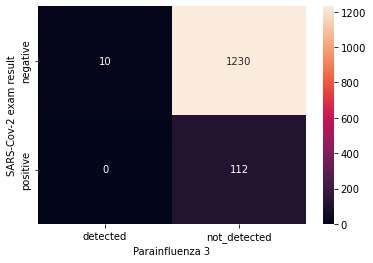

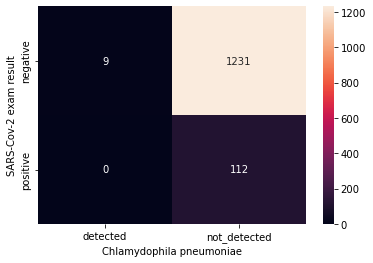

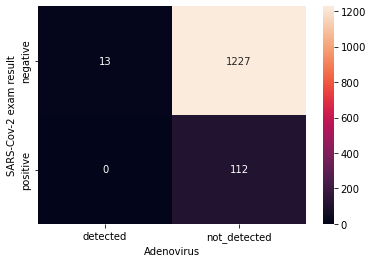

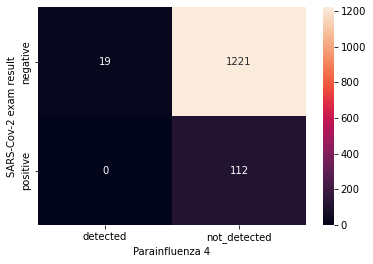

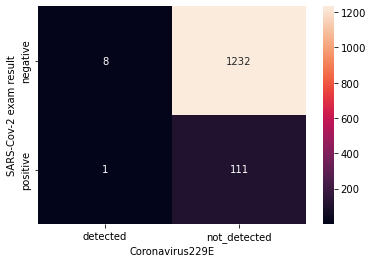

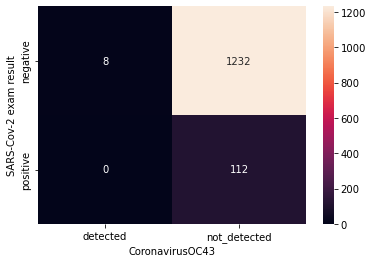

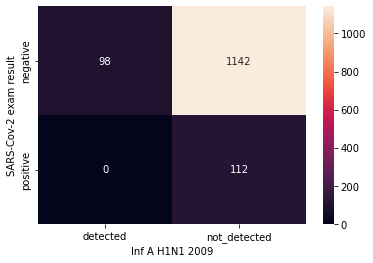

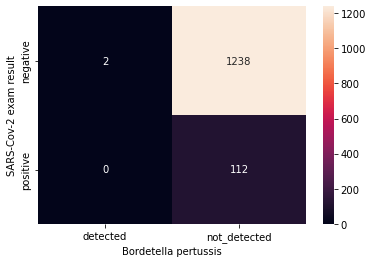

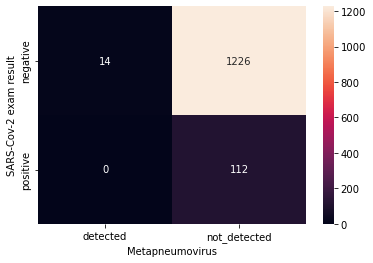

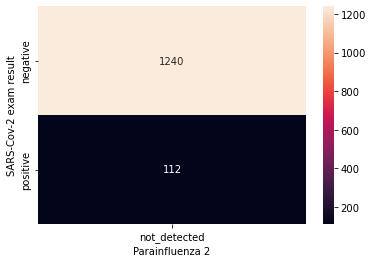

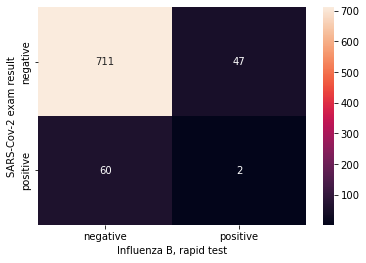

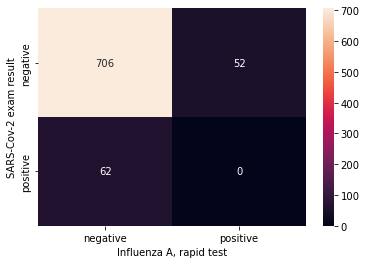

In [120]:
# Relation TARGET/VIRAL

pd.crosstab(df["SARS-Cov-2 exam result"], df["Influenza A"])

for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df["SARS-Cov-2 exam result"], df[col]), annot = True, fmt="d")

## 3) Analyse plus detaillée 

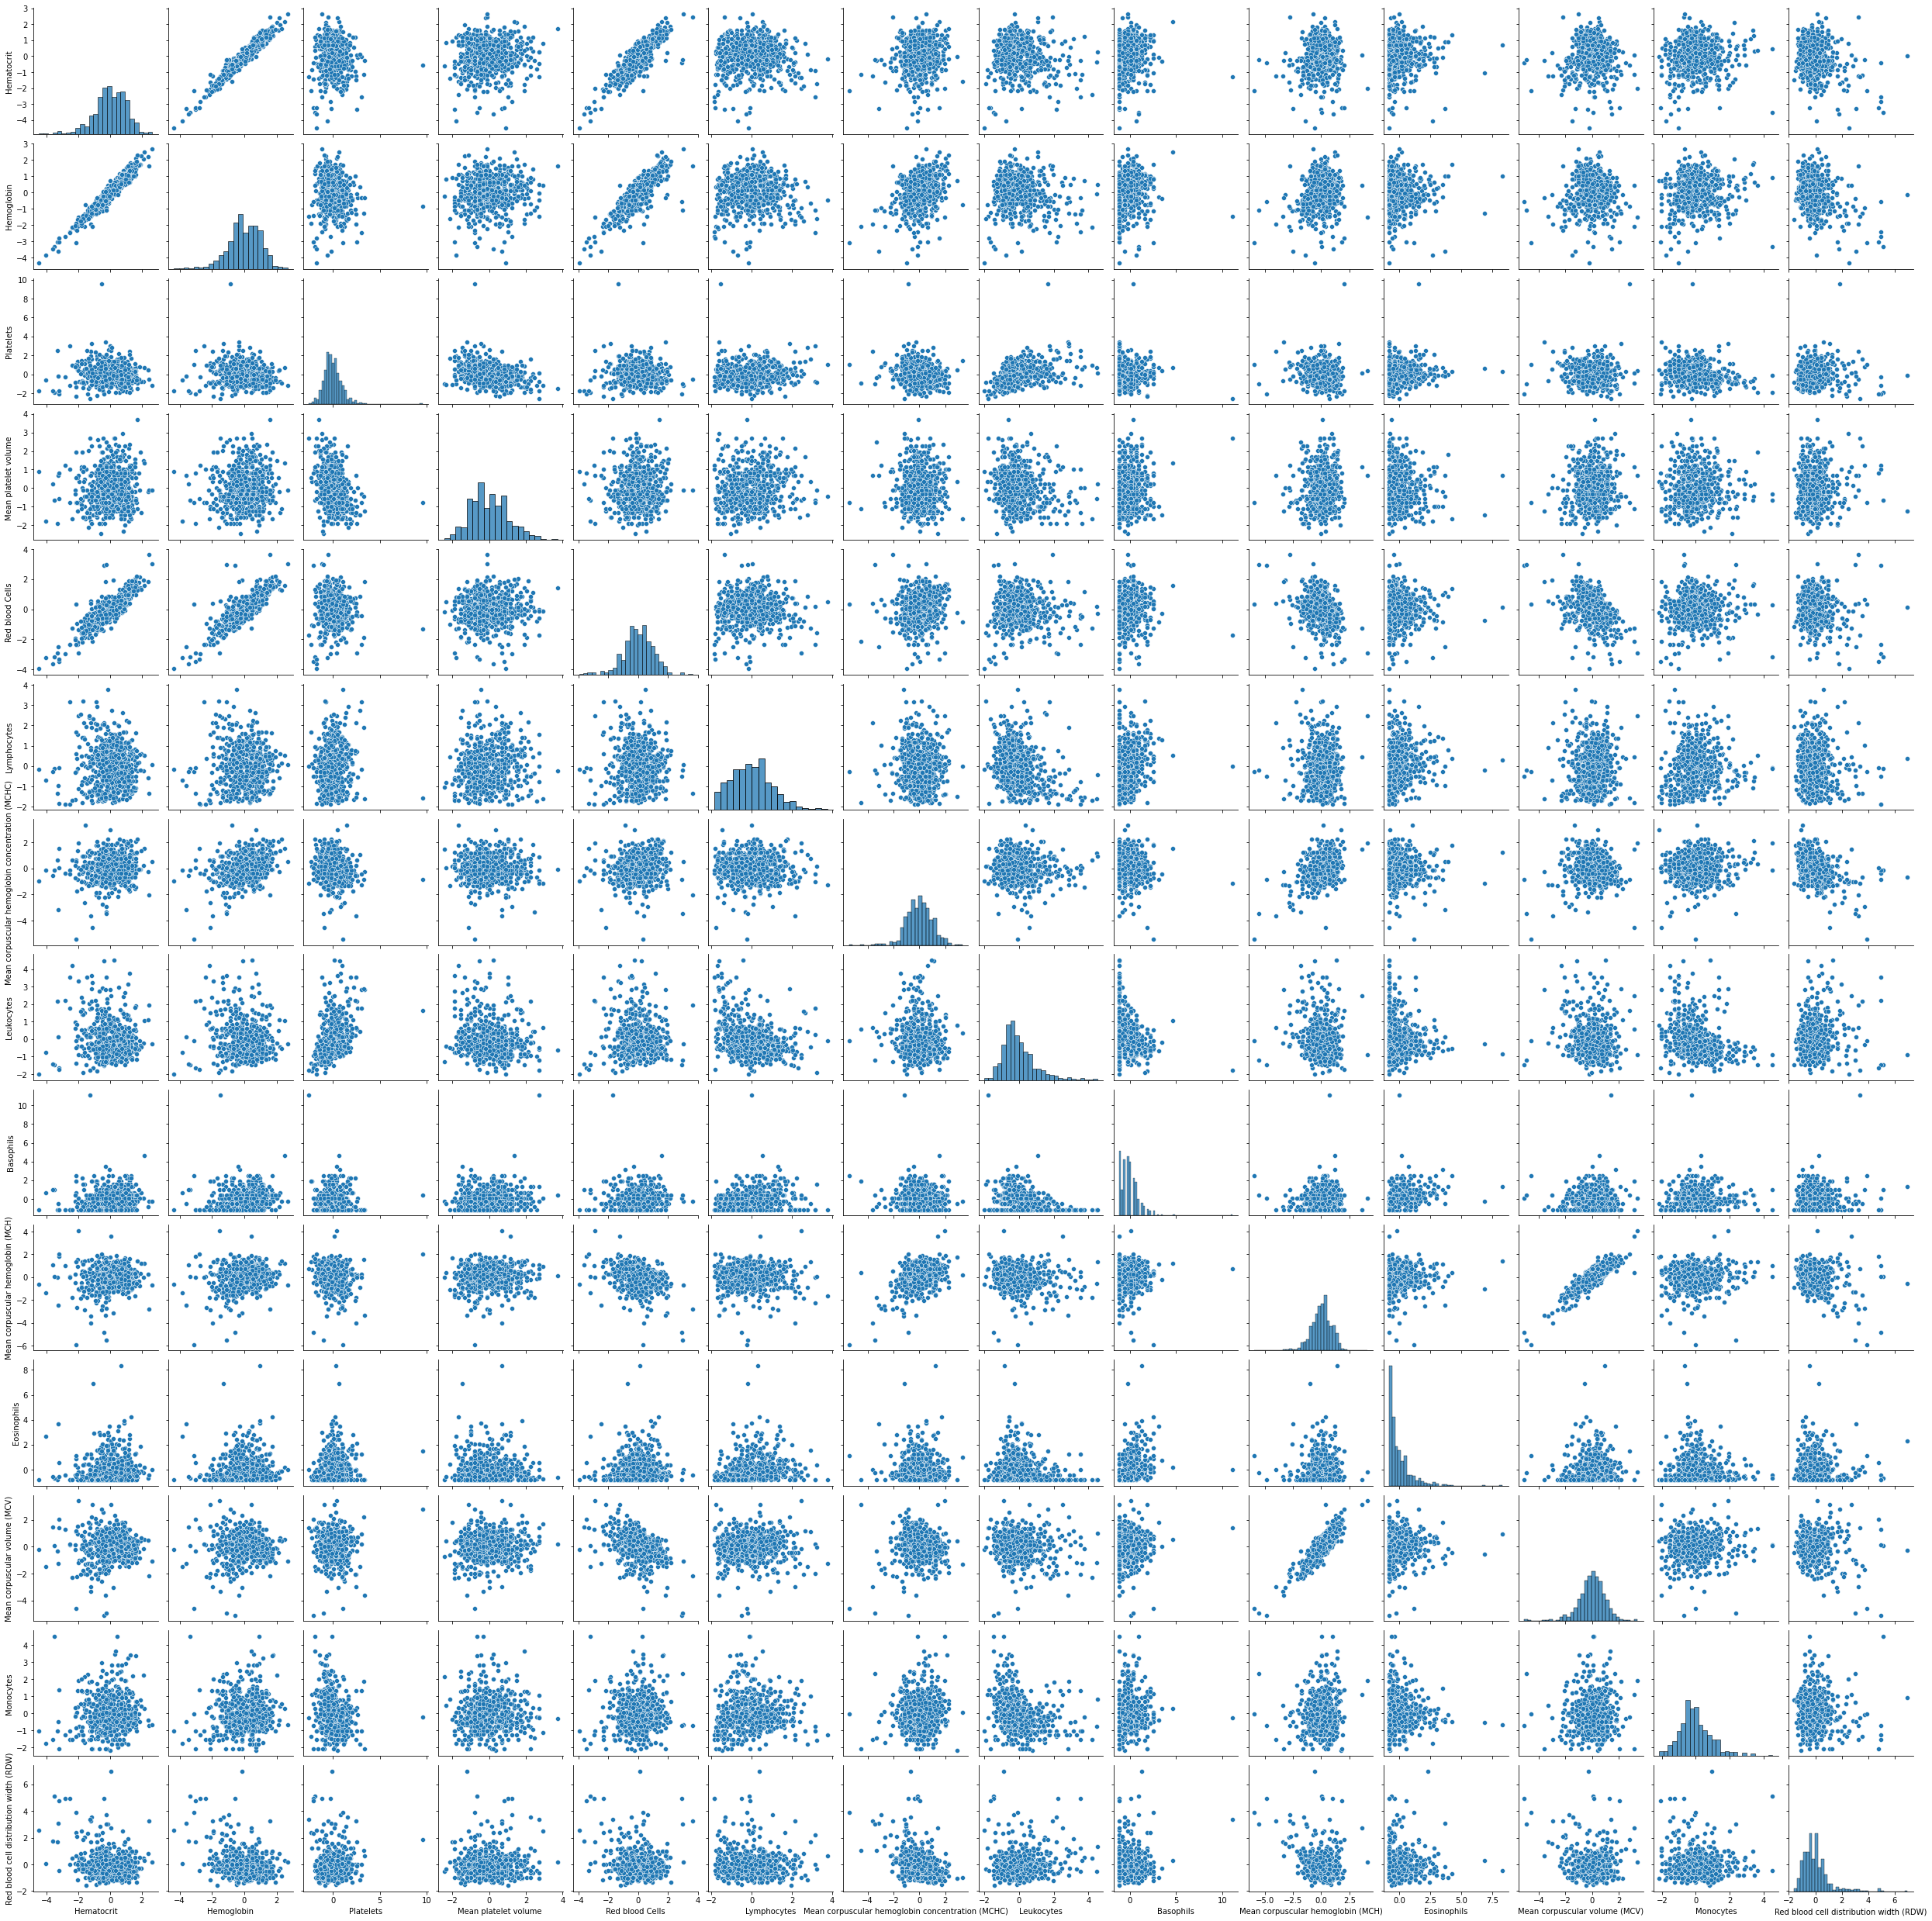

In [121]:
# Relation variable/variable: RELATION TAUX SANGUIN

sns.pairplot(df[blood_columns]) # Ce plot permet de voir directement les relations linéaires entre les variables

Plus une corrélation est proche de 1, plus les deux variables évoluent positivement les unes avec les autres.


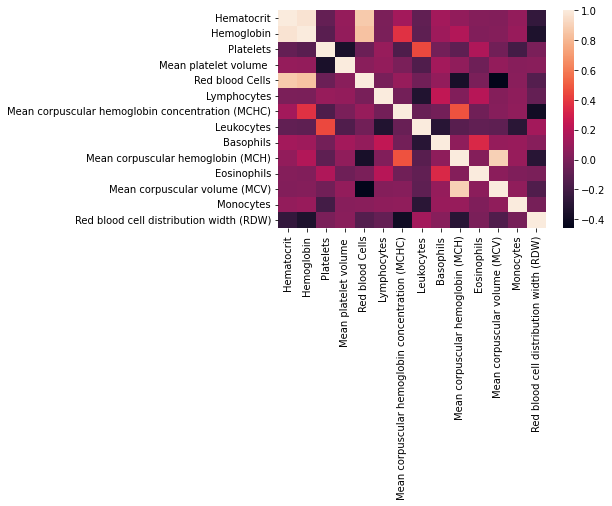

In [122]:
#Une autre méthode est possible en utilisant une heatmap avec des corrélations

sns.heatmap(df[blood_columns].corr())
print("Plus une corrélation est proche de 1, plus les deux variables évoluent positivement les unes avec les autres.")

C:\Users\Marie\AppData\Local\Temp/ipykernel_13516/2919150174.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

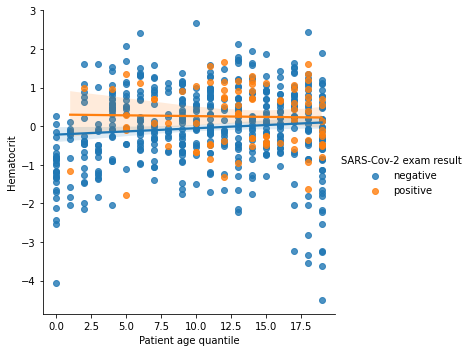

<Figure size 432x288 with 0 Axes>

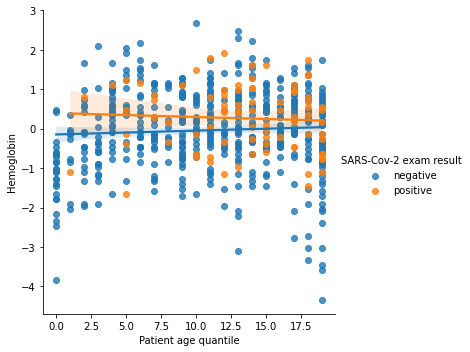

<Figure size 432x288 with 0 Axes>

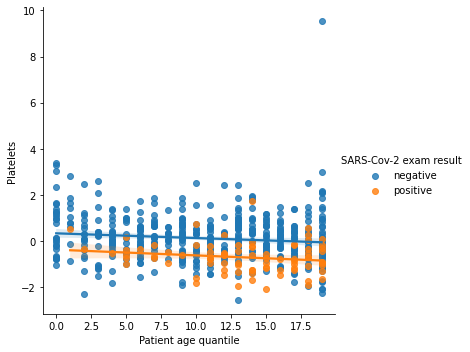

<Figure size 432x288 with 0 Axes>

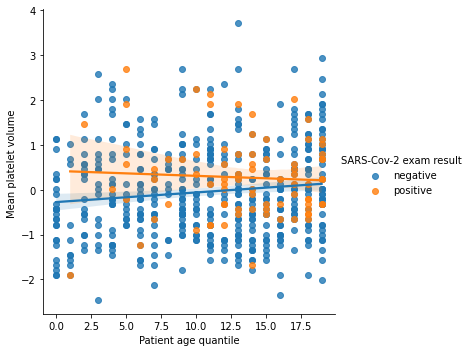

<Figure size 432x288 with 0 Axes>

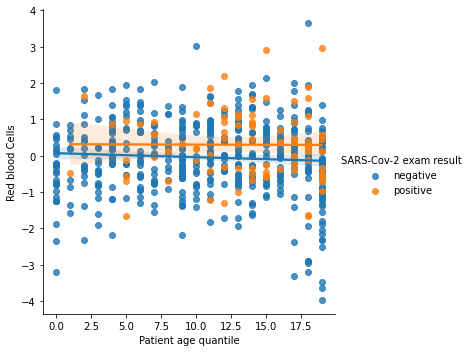

<Figure size 432x288 with 0 Axes>

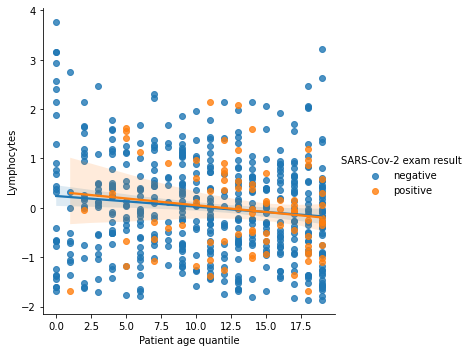

<Figure size 432x288 with 0 Axes>

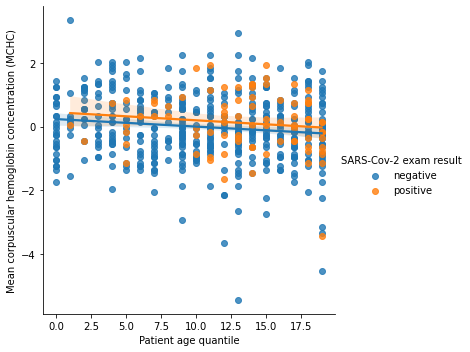

<Figure size 432x288 with 0 Axes>

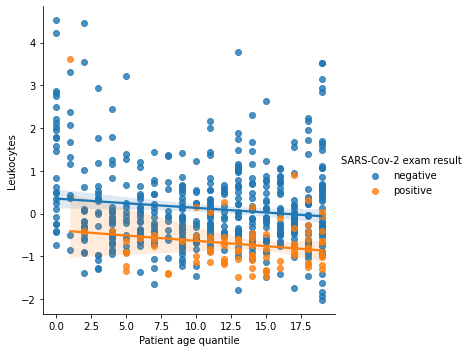

<Figure size 432x288 with 0 Axes>

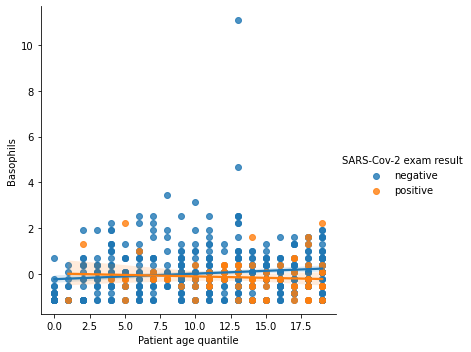

<Figure size 432x288 with 0 Axes>

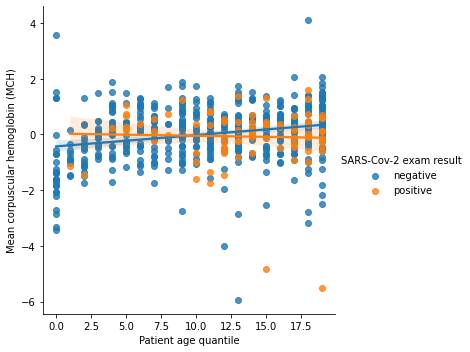

<Figure size 432x288 with 0 Axes>

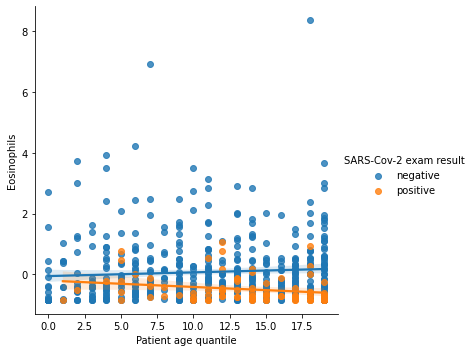

<Figure size 432x288 with 0 Axes>

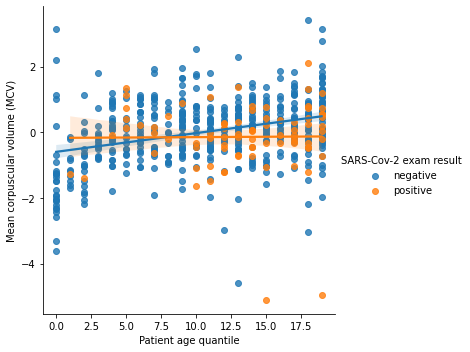

<Figure size 432x288 with 0 Axes>

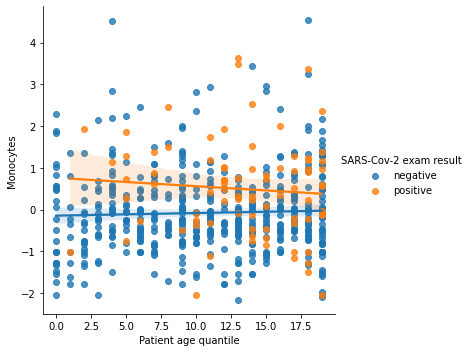

<Figure size 432x288 with 0 Axes>

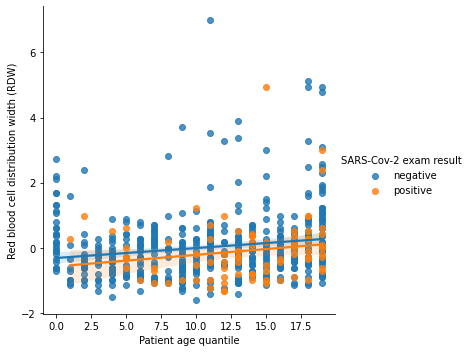

In [123]:
# Relation SANG/AGE

for col in blood_columns:
    plt.figure()
    sns.lmplot(x="Patient age quantile", y=col,hue="SARS-Cov-2 exam result", data=df) # permet de visualiser des courbes de régression dans un nuage de points

In [124]:
# Corrélation entre âge et taux sanguin 
df.corr()["Patient age quantile"].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu